In [12]:
import json 
import pandas as pd
import numpy as np
from pathlib import Path
import PIL
from PIL import Image
import cv2 
import torch
import tqdm

In [13]:
from platform import python_version
print(python_version())

3.8.20


In [14]:
import torch
print("PyTorch version: ")
print(torch.__version__)
print("CUDA Version: ")
print(torch.version.cuda)
print("cuDNN version is: ")
print(torch.backends.cudnn.version())

PyTorch version: 
2.4.1+cu121
CUDA Version: 
12.1
cuDNN version is: 
90100


In [15]:
import torch
torch.cuda.is_available()

False

In [16]:
import pandas as pd
lab = pd.read_csv('/home/yupaporn/code/Defect-Detection-2024/Dataset_Annotation_defect_Boxes_lab_v2_cropImg_cropped.csv')
lab = lab.drop(columns=['Unnamed: 0'])
lab = lab[lab['set'] != 'Train']
print(lab.shape)
lab.head()

(58, 16)


image_id  width  height file_name   set  \
25         7   1108    1477   D22.jpg  Test   
26         7   1108    1477   D22.jpg  Test   
28        21   1108    1477   D73.jpg  Test   
29        21   1108    1477   D73.jpg  Test   
30        21   1108    1477   D73.jpg  Test   

                                             img_path  xmin_cropped  \
25  /media/HDD/dataset_cctv_plate/data_defect/lab_...           137   
26  /media/HDD/dataset_cctv_plate/data_defect/lab_...           123   
28  /media/HDD/dataset_cctv_plate/data_defect/lab_...           358   
29  /media/HDD/dataset_cctv_plate/data_defect/lab_...            29   
30  /media/HDD/dataset_cctv_plate/data_defect/lab_...           628   

    ymin_cropped  xmax_cropped  ymax_cropped  \
25           701           562           747   
26           644           552           681   
28          1178           375          1194   
29           772            82           797   
30           480           638           514   

                                     img_path_cropped  width_cropped  \
25  /media/HDD/dataset_cctv_plate/data_defect/lab_...            673   
26  /media/HDD/dataset_cctv_plate/data_defect/lab_...            673   
28  /media/HDD/dataset_cctv_plate/data_defect/lab_...            703   
29  /media/HDD/dataset_cctv_plate/data_defect/lab_...            703   
30  /media/HDD/dataset_cctv_plate/data_defect/lab_...            703   

    height_cropped  height_imgcropped                   bboxx  \
25            1397                425    [137, 701, 562, 747]   
26            1397                429    [123, 644, 552, 681]   
28            1417                 17  [358, 1178, 375, 1194]   
29            1417                 53      [29, 772, 82, 797]   
30            1417                 10    [628, 480, 638, 514]   

               bboxx_wh  
25  [137, 701, 425, 46]  
26  [123, 644, 429, 37]  
28  [358, 1178, 17, 16]  
29    [29, 772, 53, 25]  
30   [628, 480, 10, 34]

In [17]:
import pandas as pd
cctv = pd.read_csv('/home/yupaporn/code/Defect-Detection-2024/Dataset_Annotation_defect_Boxes_cctv_v2_cropImg_cropped.csv')
cctv = cctv.drop(columns=['Unnamed: 0'])
cctv = cctv[cctv['set'] != 'Train']
print(cctv.shape)
cctv.head()

(25, 16)


image_id  width  height file_name   set  \
10         8   1920    1080    56.jpg  Test   
25         4   1920    1080   133.jpg  Test   
37        11   1920    1080    59.jpg  Test   
66        13   1920    1080    88.jpg  Test   
67        13   1920    1080    88.jpg  Test   

                                             img_path  xmin_cropped  \
10  /media/HDD/dataset_cctv_plate/data_defect/cctv...           172   
25  /media/HDD/dataset_cctv_plate/data_defect/cctv...           176   
37  /media/HDD/dataset_cctv_plate/data_defect/cctv...           312   
66  /media/HDD/dataset_cctv_plate/data_defect/cctv...           407   
67  /media/HDD/dataset_cctv_plate/data_defect/cctv...           325   

    ymin_cropped  xmax_cropped  ymax_cropped  \
10           268           186           280   
25           341           179           346   
37           262           383           293   
66           235           412           242   
67           295           332           302   

                                     img_path_cropped  width_cropped  \
10  /media/HDD/dataset_cctv_plate/img_croped/cctv_...            554   
25  /media/HDD/dataset_cctv_plate/img_croped/cctv_...            558   
37  /media/HDD/dataset_cctv_plate/img_croped/cctv_...            714   
66  /media/HDD/dataset_cctv_plate/img_croped/cctv_...            824   
67  /media/HDD/dataset_cctv_plate/img_croped/cctv_...            824   

    height_cropped  height_imgcropped                 bboxx  \
10             536                 14  [172, 268, 186, 280]   
25             558                  3  [176, 341, 179, 346]   
37             658                 71  [312, 262, 383, 293]   
66             811                  5  [407, 235, 412, 242]   
67             811                  7  [325, 295, 332, 302]   

              bboxx_wh  
10  [172, 268, 14, 12]  
25    [176, 341, 3, 5]  
37  [312, 262, 71, 31]  
66    [407, 235, 5, 7]  
67    [325, 295, 7, 7]

In [18]:
test_df = pd.concat([lab, cctv], ignore_index=True)
print(test_df.shape)
test_df.head()

(83, 16)


image_id  width  height file_name   set  \
0         7   1108    1477   D22.jpg  Test   
1         7   1108    1477   D22.jpg  Test   
2        21   1108    1477   D73.jpg  Test   
3        21   1108    1477   D73.jpg  Test   
4        21   1108    1477   D73.jpg  Test   

                                            img_path  xmin_cropped  \
0  /media/HDD/dataset_cctv_plate/data_defect/lab_...           137   
1  /media/HDD/dataset_cctv_plate/data_defect/lab_...           123   
2  /media/HDD/dataset_cctv_plate/data_defect/lab_...           358   
3  /media/HDD/dataset_cctv_plate/data_defect/lab_...            29   
4  /media/HDD/dataset_cctv_plate/data_defect/lab_...           628   

   ymin_cropped  xmax_cropped  ymax_cropped  \
0           701           562           747   
1           644           552           681   
2          1178           375          1194   
3           772            82           797   
4           480           638           514   

                                    img_path_cropped  width_cropped  \
0  /media/HDD/dataset_cctv_plate/data_defect/lab_...            673   
1  /media/HDD/dataset_cctv_plate/data_defect/lab_...            673   
2  /media/HDD/dataset_cctv_plate/data_defect/lab_...            703   
3  /media/HDD/dataset_cctv_plate/data_defect/lab_...            703   
4  /media/HDD/dataset_cctv_plate/data_defect/lab_...            703   

   height_cropped  height_imgcropped                   bboxx  \
0            1397                425    [137, 701, 562, 747]   
1            1397                429    [123, 644, 552, 681]   
2            1417                 17  [358, 1178, 375, 1194]   
3            1417                 53      [29, 772, 82, 797]   
4            1417                 10    [628, 480, 638, 514]   

              bboxx_wh  
0  [137, 701, 425, 46]  
1  [123, 644, 429, 37]  
2  [358, 1178, 17, 16]  
3    [29, 772, 53, 25]  
4   [628, 480, 10, 34]

In [19]:
test_df['xmin'] = test_df['xmin_cropped']
test_df['ymin'] = test_df['ymin_cropped']
test_df['xmax'] = test_df['xmax_cropped']
test_df['ymax'] = test_df['ymax_cropped']

In [20]:
set(test_df['file_name'])

{'131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '88.jpg',
 'D02.jpg',
 'D04.jpg',
 'D05.jpg',
 'D06.jpg',
 'D10.jpg',
 'D12.jpg',
 'D22.jpg',
 'D28.jpg',
 'D32.jpg',
 'D34.jpg',
 'D37.jpg',
 'D43.jpg',
 'D46.jpg',
 'D50.jpg',
 'D51.jpg',
 'D54.jpg',
 'D55.jpg',
 'D61.jpg',
 'D65.jpg',
 'D69.jpg',
 'D73.jpg',
 'D81.jpg'}

In [21]:
image = test_df['img_path_cropped'].tolist()[0]
image

'/media/HDD/dataset_cctv_plate/data_defect/lab_defect/img_croped/lab_D22.jpg'

In [22]:
image = test_df['img_path_cropped'].tolist()[10]  ## **-- path/to/image/.jpg 
image_cv = cv2.imread(image)[..., ::-1] 
image_cv

array([[[127, 127, 125],
        [127, 127, 125],
        [126, 126, 124],
        ...,
        [143, 147, 150],
        [142, 146, 149],
        [141, 145, 148]],

       [[127, 127, 125],
        [127, 127, 125],
        [126, 126, 124],
        ...,
        [144, 148, 151],
        [142, 146, 149],
        [142, 146, 149]],

       [[127, 127, 125],
        [127, 127, 125],
        [126, 126, 124],
        ...,
        [144, 148, 151],
        [143, 147, 150],
        [143, 147, 150]],

       ...,

       [[137, 135, 136],
        [138, 136, 137],
        [138, 136, 137],
        ...,
        [144, 143, 138],
        [142, 141, 136],
        [141, 140, 135]],

       [[137, 135, 136],
        [139, 137, 138],
        [139, 137, 138],
        ...,
        [144, 143, 139],
        [142, 141, 136],
        [142, 141, 136]],

       [[137, 135, 136],
        [140, 138, 139],
        [140, 138, 139],
        ...,
        [144, 143, 139],
        [142, 141, 136],
        [142, 141, 136]]

In [23]:
# ##**-- model = model
# model.conf = 0.10 # NMS confidence threshold
# model.iou = 0.50 # NMS IoU threshold
# model.classes = None   # (optional list) filter by class, i.e. = [0, 15, 16] for persons, cats and dogs
# model.multi_label = False  # NMS multiple labels per box
# model.max_det = 1000
# ### Result ---***  
# results = model(image_cv, size=640)    #--** image == 1 
# results.print()  
# results.pandas().xyxy[0]

In [24]:
# results.pandas().xyxy

In [25]:
# Prepare batched list of images to input for prediction multiple images
s_pth = list(set(test_df.img_path_cropped))
print(len(s_pth))
s_pth

32


['/media/HDD/dataset_cctv_plate/data_defect/lab_defect/img_croped/lab_D22.jpg',
 '/media/HDD/dataset_cctv_plate/data_defect/lab_defect/img_croped/lab_D81.jpg',
 '/media/HDD/dataset_cctv_plate/data_defect/lab_defect/img_croped/lab_D28.jpg',
 '/media/HDD/dataset_cctv_plate/img_croped/cctv_59.jpg',
 '/media/HDD/dataset_cctv_plate/data_defect/lab_defect/img_croped/lab_D50.jpg',
 '/media/HDD/dataset_cctv_plate/data_defect/lab_defect/img_croped/lab_D46.jpg',
 '/media/HDD/dataset_cctv_plate/data_defect/lab_defect/img_croped/lab_D73.jpg',
 '/media/HDD/dataset_cctv_plate/img_croped/cctv_60.jpg',
 '/media/HDD/dataset_cctv_plate/data_defect/lab_defect/img_croped/lab_D06.jpg',
 '/media/HDD/dataset_cctv_plate/img_croped/cctv_56.jpg',
 '/media/HDD/dataset_cctv_plate/data_defect/lab_defect/img_croped/lab_D55.jpg',
 '/media/HDD/dataset_cctv_plate/data_defect/lab_defect/img_croped/lab_D37.jpg',
 '/media/HDD/dataset_cctv_plate/data_defect/lab_defect/img_croped/lab_D43.jpg',
 '/media/HDD/dataset_cctv_pla

In [26]:
##loop get multiple images to --- ** batched list of images 
### --- ใช้ s_pth ----- 
bat_images = []
for k in s_pth:
    #image = Image.open(k)
    image_cv = cv2.imread(k)[..., ::-1] 
    bat_images.append(image_cv)
    
print(len(bat_images))
bat_images 

32


[array([[[162, 162, 154],
         [165, 165, 157],
         [167, 167, 159],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[160, 160, 152],
         [163, 163, 155],
         [165, 165, 157],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[158, 158, 150],
         [162, 162, 154],
         [163, 163, 155],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[206, 203, 198],
         [207, 204, 199],
         [207, 203, 200],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[211, 208, 203],
         [210, 207, 202],
         [209, 205, 202],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[205, 200, 196],
         [210, 205, 201],
         [213, 208, 205],
         ...,
         [255, 255, 255],
  

# Run inference Multiple images

In [27]:
path_model = '/home/yupaporn/code/Defect-Detection-2024/yolov5/runs/train/exp15/weights/last.pt'
#model = torch.hub.load('ultralytics/yolov5', 'custom', path=path_model, device='cpu')  # local model # CPU
#model = torch.hub.load(f_yolo5, 'custom', path=path_model, source='local', device='cpu')  # local repo
model = torch.hub.load('ultralytics/yolov5', 'custom', path=path_model) # local model
# device = torch.device('cuda:0') #device=torch.device(0)
device = torch.device('cpu')
model = model.to(device)

Using cache found in /home/yupaporn/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-14 Python-3.8.20 torch-2.4.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


# Run batched inference with YOLOv5 and PyTorch Hub:

In [28]:
def predict(confident, s_pth, bat_images): ## bat_images >>> --** batched list of images **-- multiple images, s_pth == list(set(test_df.img_path))
    model.conf = confident # NMS confidence threshold
    model.iou = 0.50 # NMS IoU threshold
    model.classes = None   # (optional list) filter by class, i.e. = [0, 15, 16] for persons, cats and dogs
    model.multi_label = False  # NMS multiple labels per box
    model.max_det = 1000
    ### Result ---*** 
    results = model(bat_images, size=640)  
    
    all_table = [] 
    for i, j in zip(range(len(results.xyxy)), s_pth):
        if len(results.xyxy[i]) == 0 :
            #print(i)
            results.xyxy[i] = torch.tensor([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], dtype=torch.float)
        
        table = results.pandas().xyxy[i]
        table['img_path_cropped'] = j  #s_pth
        table['image_id'] = j.split('/')[-1]
        all_table.append(table)
        
    con_table = pd.concat(all_table,axis=0).reset_index(drop=True)
    ##Change columns name 
    con_table0 = con_table.rename({'xmin':'pred_xmin' ,'ymin':'pred_ymin', 
                                       'xmax':'pred_xmax', 'ymax':'pred_ymax', 'confidence':'score'}, axis=1)
    
    #results.print()  
    #print(len(all_table))
    #all_table
    return con_table0

In [29]:
confident = 0.10
con_table0 = predict(confident, s_pth, bat_images)
print(con_table0.shape)
con_table0

/home/yupaporn/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


(84, 9)


pred_xmin    pred_ymin   pred_xmax    pred_ymax     score  class    name  \
0     0.000000     0.000000    0.000000     0.000000  0.000000      0  Defect   
1   821.248657   432.658112  841.642029   456.961090  0.892776      0  Defect   
2   301.108002   557.210693  318.052643   573.454285  0.769059      0  Defect   
3   713.098511   587.679077  731.161255   606.258484  0.643320      0  Defect   
4   358.182037   597.769348  385.183197   622.621704  0.386766      0  Defect   
..         ...          ...         ...          ...       ...    ...     ...   
79  701.809631   912.674805  710.920593   922.081970  0.192278      0  Defect   
80  214.523621  1172.416260  229.717529  1183.552856  0.135154      0  Defect   
81  351.362915   250.169922  361.977905   259.795013  0.823754      0  Defect   
82  188.525696   551.244019  376.358307   697.568909  0.583097      0  Defect   
83  377.106628   361.828888  399.793304   383.507172  0.352770      0  Defect   

                                     img_path_cropped     image_id  
0   /media/HDD/dataset_cctv_plate/data_defect/lab_...  lab_D22.jpg  
1   /media/HDD/dataset_cctv_plate/data_defect/lab_...  lab_D81.jpg  
2   /media/HDD/dataset_cctv_plate/data_defect/lab_...  lab_D81.jpg  
3   /media/HDD/dataset_cctv_plate/data_defect/lab_...  lab_D81.jpg  
4   /media/HDD/dataset_cctv_plate/data_defect/lab_...  lab_D81.jpg  
..                                                ...          ...  
79  /media/HDD/dataset_cctv_plate/data_defect/lab_...  lab_D69.jpg  
80  /media/HDD/dataset_cctv_plate/data_defect/lab_...  lab_D69.jpg  
81  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_57.jpg  
82  /media/HDD/dataset_cctv_plate/data_defect/lab_...  lab_D34.jpg  
83  /media/HDD/dataset_cctv_plate/data_defect/lab_...  lab_D34.jpg  

[84 rows x 9 columns]

### 1. Get Predict Bbox to 1 row 

In [30]:
#รวม prediction box ใน 1 image 
def get_one_pre(table) : 
    a = table.groupby(['img_path_cropped']).count()
    a = table.iloc[:,0]
    aa_ =[]
    for  i in  range(len(a)):
        aa = a[i]
        aa_.append(aa)
    name = sorted(list(set(table['img_path_cropped'])))

    fileName_, x1s_, y1s_, x2s_, y2s_, score_ = [], [], [], [], [], []
    for j in name:
        x1_, y1_, x2_, y2_, score = [], [], [], [], []
        fileName_.append(j)
        for i in range(len(table)):
            fileName = table['img_path_cropped'][i] 
            if fileName == j:
                x1_.append(table['pred_xmin'][i])
                y1_.append(table['pred_ymin'][i])
                x2_.append(table['pred_xmax'][i])
                y2_.append(table['pred_ymax'][i])
                score.append(table['score'][i])
                #Path_.append(table['Path'][i])

        x1s_.append(x1_)
        y1s_.append(y1_)
        x2s_.append(x2_)
        y2s_.append(y2_)
        score_.append(score)

    result = {'img_path_cropped': fileName_, 'pred_xmin': x1s_,'pred_ymin': y1s_,'pred_xmax': x2s_,'pred_ymax': y2s_, 'pred_score': score_}
    result = pd.DataFrame(result, columns=['img_path_cropped', 'pred_xmin','pred_ymin','pred_xmax','pred_ymax', 'pred_score'])
    
    result['pred_count'] = ''
    emp = list()
    for k in range(len(result)):
        if result['pred_score'][k][0] == 0.0:
            result.loc[result.index[k], 'pred_count'] = 0
        else:
            result.loc[result.index[k], 'pred_count'] = len(result['pred_score'][k])

    return result

In [31]:
result = get_one_pre(con_table0)
#result = get_one_pre(table)
print(result.shape)
result

(32, 7)


img_path_cropped  \
0   /media/HDD/dataset_cctv_plate/data_defect/lab_...   
1   /media/HDD/dataset_cctv_plate/data_defect/lab_...   
2   /media/HDD/dataset_cctv_plate/data_defect/lab_...   
3   /media/HDD/dataset_cctv_plate/data_defect/lab_...   
4   /media/HDD/dataset_cctv_plate/data_defect/lab_...   
5   /media/HDD/dataset_cctv_plate/data_defect/lab_...   
6   /media/HDD/dataset_cctv_plate/data_defect/lab_...   
7   /media/HDD/dataset_cctv_plate/data_defect/lab_...   
8   /media/HDD/dataset_cctv_plate/data_defect/lab_...   
9   /media/HDD/dataset_cctv_plate/data_defect/lab_...   
10  /media/HDD/dataset_cctv_plate/data_defect/lab_...   
11  /media/HDD/dataset_cctv_plate/data_defect/lab_...   
12  /media/HDD/dataset_cctv_plate/data_defect/lab_...   
13  /media/HDD/dataset_cctv_plate/data_defect/lab_...   
14  /media/HDD/dataset_cctv_plate/data_defect/lab_...   
15  /media/HDD/dataset_cctv_plate/data_defect/lab_...   
16  /media/HDD/dataset_cctv_plate/data_defect/lab_...   
17  /media/HDD/dataset_cctv_plate/data_defect/lab_...   
18  /media/HDD/dataset_cctv_plate/data_defect/lab_...   
19  /media/HDD/dataset_cctv_plate/data_defect/lab_...   
20  /media/HDD/dataset_cctv_plate/data_defect/lab_...   
21  /media/HDD/dataset_cctv_plate/data_defect/lab_...   
22  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   
23  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   
24  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   
25  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   
26  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   
27  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   
28  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   
29  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   
30  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   
31  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   

                                            pred_xmin  \
0               [591.518310546875, 399.0064392089844]   
1   [162.4498748779297, 215.22764587402344, 484.33...   
2              [130.2027587890625, 296.4367980957031]   
3                                [215.60781860351562]   
4              [92.14707946777344, 516.2742919921875]   
5                                [207.17416381835938]   
6                                               [0.0]   
7             [1074.8663330078125, 562.2984008789062]   
8                                 [396.0093078613281]   
9            [188.52569580078125, 377.10662841796875]   
10  [354.16619873046875, 24.498106002807617, 142.0...   
11  [359.299072265625, 25.330385208129883, 141.855...   
12             [615.7794189453125, 715.4940795898438]   
13                                [671.5661010742188]   
14                                [462.6343994140625]   
15                                [918.4428100585938]   
16             [352.8060302734375, 212.3892059326172]   
17                                              [0.0]   
18  [874.450439453125, 446.0747375488281, 462.8071...   
19  [526.5640258789062, 576.12548828125, 731.26873...   
20  [163.46681213378906, 360.0316467285156, 45.296...   
21  [821.2486572265625, 301.1080017089844, 713.098...   
22  [180.54013061523438, 232.3007354736328, 250.60...   
23            [222.02630615234375, 282.1394348144531]   
24                               [174.62635803222656]   
25  [181.99391174316406, 344.34124755859375, 251.5...   
26                                [174.0061798095703]   
27                                [351.3629150390625]   
28                               [183.87753295898438]   
29                                [314.3414001464844]   
30                               [471.20867919921875]   
31  [526.3636474609375, 407.8194885253906, 300.196...   

                                            pred_ymin  \
0                [268.79833984375, 283.0750732421875]   
1   [280.27874755859375, 476.3576965332031, 365.50...   
2             [201.98016357421875, 492.6541442871094]   
3                                   [712.8012

### 2. Get Actual Bbox to 1 row

In [32]:
def ActualTeble(test_df):
    #เก็บค่า shape images
    list_shape_0 = []
    list_shape_1 = []
    path = sorted(list(set(test_df['img_path_cropped'])))
    for i in range(len(path)) :
        list_shape_0.append(cv2.imread(path[i]).shape[0])
        list_shape_1.append(cv2.imread(path[i]).shape[1])

    #เก็บค่า fileName และ จำนวนที่ซ้ำ *Non-duplicate 
    a = test_df.groupby(['img_path_cropped']).count()
    a = a.iloc[:,0]
    aa_ =[]
    for  i in  range(len(a)):
        aa = a[i]
        aa_.append(aa)
    name = sorted(list(set(test_df['img_path_cropped'])))

    #รวม actual box ใน 1 image 
    fileName_, x1s_, y1s_, x2s_, y2s_ =[], [], [], [], []
    image_id = []
    for j in name:
        x1_, y1_, x2_, y2_ =[], [], [], []
        fileName_.append(j)
        for i in range(len(test_df)):
            fileName = test_df['img_path_cropped'].tolist()[i] 
            if fileName == j:
                x1_.append(test_df['xmin'].tolist()[i])
                y1_.append(test_df['ymin'].tolist()[i])
                x2_.append(test_df['xmax'].tolist()[i])
                y2_.append(test_df['ymax'].tolist()[i])
        x1s_.append(x1_)
        y1s_.append(y1_)
        x2s_.append(x2_)
        y2s_.append(y2_)
        
        image_id.append(j.split('/')[-1])

    test_df0 = {'img_path_cropped': fileName_, 'image_id':image_id, 'shape_0':list_shape_0, 'shape_1':list_shape_1, 'gt_xmin': x1s_,'gt_ymin': y1s_,'gt_xmax': x2s_,'gt_ymax': y2s_, 'count': aa_}
    test_df0 = pd.DataFrame(test_df0, columns=['img_path_cropped', 'image_id', 'shape_0', 'shape_1', 'gt_xmin','gt_ymin','gt_xmax','gt_ymax', 'count'])

    return test_df0

In [33]:
test_df0 = ActualTeble(test_df)
print(test_df0.shape)
test_df0

(32, 9)


img_path_cropped      image_id  shape_0  \
0   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D02.jpg      892   
1   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D04.jpg     1224   
2   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D05.jpg     1391   
3   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D06.jpg     1408   
4   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D10.jpg     1450   
5   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D12.jpg     1428   
6   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D22.jpg     1397   
7   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D28.jpg      878   
8   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D32.jpg     1339   
9   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D34.jpg     1145   
10  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D37.jpg     1445   
11  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D43.jpg     1434   
12  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D46.jpg     1081   
13  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D50.jpg     1089   
14  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D51.jpg     1404   
15  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D54.jpg     1169   
16  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D55.jpg     1112   
17  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D61.jpg     1443   
18  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D65.jpg     1447   
19  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D69.jpg     1303   
20  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D73.jpg     1417   
21  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D81.jpg     1133   
22  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_131.jpg      555   
23  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_132.jpg      686   
24  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_133.jpg      558   
25  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_134.jpg      593   
26  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_56.jpg      536   
27  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_57.jpg      535   
28  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_58.jpg      575   
29  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_59.jpg      658   
30  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_60.jpg      725   
31  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_88.jpg      811   

    shape_1                                            gt_xmin  \
0       902                                              [408]   
1       873                                              [158]   
2       669                                              [132]   
3       747                                              [218]   
4       704                                           [76, 93]   
5       727                                              [219]   
6       673                                         [137, 123]   
7      1377                                        [1075, 561]   
8       627                                              [459]   
9      1174                                              [191]   
10      690                 [354, 142, 12, 131, 230, 222, 300]   
11      696                                         [145, 359]   
12     1086                                         [615, 715]   
13     1093                                              [674]   
14     1024                                              [843]   
15     1093                                              [917]   
16     1086                                              [351]   
17     1046                                              [943]   
18     1068  [406, 460, 789, 778, 194, 521, 203, 194, 261, ...   
19     1014                                    [525, 572, 730]   
20      70

In [34]:
map_table = test_df0.merge(result, how ='left', left_on='img_path_cropped',right_on='img_path_cropped' )
print(map_table.shape)
map_table

(32, 15)


img_path_cropped      image_id  shape_0  \
0   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D02.jpg      892   
1   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D04.jpg     1224   
2   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D05.jpg     1391   
3   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D06.jpg     1408   
4   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D10.jpg     1450   
5   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D12.jpg     1428   
6   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D22.jpg     1397   
7   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D28.jpg      878   
8   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D32.jpg     1339   
9   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D34.jpg     1145   
10  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D37.jpg     1445   
11  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D43.jpg     1434   
12  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D46.jpg     1081   
13  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D50.jpg     1089   
14  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D51.jpg     1404   
15  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D54.jpg     1169   
16  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D55.jpg     1112   
17  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D61.jpg     1443   
18  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D65.jpg     1447   
19  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D69.jpg     1303   
20  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D73.jpg     1417   
21  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D81.jpg     1133   
22  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_131.jpg      555   
23  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_132.jpg      686   
24  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_133.jpg      558   
25  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_134.jpg      593   
26  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_56.jpg      536   
27  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_57.jpg      535   
28  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_58.jpg      575   
29  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_59.jpg      658   
30  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_60.jpg      725   
31  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_88.jpg      811   

    shape_1                                            gt_xmin  ...  \
0       902                                              [408]  ...   
1       873                                              [158]  ...   
2       669                                              [132]  ...   
3       747                                              [218]  ...   
4       704                                           [76, 93]  ...   
5       727                                              [219]  ...   
6       673                                         [137, 123]  ...   
7      1377                                        [1075, 561]  ...   
8       627                                              [459]  ...   
9      1174                                              [191]  ...   
10      690                 [354, 142, 12, 131, 230, 222, 300]  ...   
11      696                                         [145, 359]  ...   
12     1086                                         [615, 715]  ...   
13     1093                                              [674]  ...   
14     1024                                              [843]  ...   
15     1093                                              [917]  ...   
16     1086                                              [351]  ...   
17     1046                                              [943]  ...   
18     1068  [406, 460, 789, 778, 194, 521, 203

# Prediction function

In [35]:
def IoUfunction(res):
    pre_ ,  gt_ = [], []
    i = 0

    for j in range(len(res['pred_xmin'].tolist()[i])):
        xmin_pre = int(res['pred_xmin'].tolist()[i][j])
        ymin_pre = int(res['pred_ymin'].tolist()[i][j])
        xmax_pre = int(res['pred_xmax'].tolist()[i][j])
        ymax_pre = int(res['pred_ymax'].tolist()[i][j])
        pre = [xmin_pre, ymin_pre, xmax_pre, ymax_pre]
        pre_.append(pre)

    for j in range(len(res['gt_xmin'].tolist()[i])):
        xmin_gt= int(res['gt_xmin'].tolist()[i][j])
        ymin_gt = int(res['gt_ymin'].tolist()[i][j])
        xmax_gt= int(res['gt_xmax'].tolist()[i][j])
        ymax_gt = int(res['gt_ymax'].tolist()[i][j])
        gt = [xmin_gt, ymin_gt, xmax_gt, ymax_gt]
        gt_.append(gt)

    #ป้องกัน ไม่มีผล predict
    if pre_ == 0.0:   ##if pre_ == np.NaN ## check NaN value()
        iou_pred = torch.tensor([0], dtype=torch.float)
        iou_gt = torch.tensor([0], dtype=torch.float)
    else:
        box1 = torch.tensor(pre_, dtype=torch.float)
        box2 = torch.tensor(gt_, dtype=torch.float)
        iou_pred = bops.box_iou(box1, box2)
        iou_gt = bops.box_iou(box2, box1)

    return iou_pred, iou_gt

In [36]:
import torch
import torchvision.ops.boxes as bops

def EvaluationTeble(result, threshold_iou):
    IoU_pred, IoUavg_img_ = [], []
    fileName = result['image_id'].tolist()

    TP, FP, FN = [], [], []
    Gt_count_ = []
    for i in fileName:   
        #IoU Function
        res = result[result['image_id'] == i ]
        Gt_count = res['count'].tolist()[0]
        pre_count = res['pred_count'].tolist()[0]
        iou_pred, iou_gt = IoUfunction(res)
        Gt_count_.append(Gt_count)
        if pre_count == 0 :
            TP.append(0)
            FP.append(0)
            FN.append(Gt_count) 
            IoU_pred.append(torch.tensor([0], dtype=torch.float))
        else:
            '''Box Predict checking '''
#             iou_PdGt_ = []
#             IoUavg_im = []
            iou_tp_ =  []
            iou_fp_ =  []
            '''1 . TP = number of detections with IoU>=0.5 '''
            for i in range(len(iou_pred)):  ### 
                iou_tp = max(iou_pred[i])
                if iou_tp == threshold_iou:
                    iou_tp = 1
                    iou_tp_.append(iou_tp)
                elif iou_tp > threshold_iou:
                    iou_tp = 1
                    iou_tp_.append(iou_tp)

            ''' 2 . FP = number of detections with IoU<0.5 or detected more than once '''
            for i in range(len(iou_pred)):  ### 
                iou_fp = max(iou_pred[i])
                if iou_fp < threshold_iou:
                    iou_fp = 0
                    iou_fp_.append(iou_fp)
            #TP,FP
            tp, fp = 0, 0
            for i in list(set(iou_tp_)):
                if len(iou_tp_) != 0:
                    i==1
                    tp = iou_tp_.count(i)
                else:
                    tp=0
                    
            for j in list(set(iou_fp_)):
                if len(iou_fp_) != 0:
                    j==0
                    fp = iou_fp_.count(j)
                else:
                    fp=0
                    
            if tp > Gt_count:
                tp_gt = tp-Gt_count
                tp = Gt_count
                fp = fp+tp_gt

            ''' 3 . FN = number of detections with IoU<0.5 '''
#             print(Gt_count, (tp+fp) )
            fn_result = Gt_count-(tp)
            
            if fn_result > 0:
                fn = fn_result
            else:
                fn = 0
                
            ## Append to performance list 
            
            
            TP.append(tp)
            FP.append(fp)
            FN.append(fn) 
            IoU_pred.append(iou_pred)
#     print(len(Gt_count_))
    result['Gt_count'] = Gt_count_
    result['IoU_img'] = IoU_pred
    result['TP'] = TP
    result['FP'] = FP
    result['FN'] = FN
#     ###Check TP
#     for i in range(len(result)) :
#         if result['TP'][i] > result['count'][i]:
#             result.loc[result.index[i], 'TP'] = result['count'][i]

    return result

In [37]:
# Gt_count_

In [38]:
threshold_iou = 0.50
Eva_table = EvaluationTeble(map_table, threshold_iou)
print(Eva_table.shape)
Eva_table

(32, 20)


img_path_cropped      image_id  shape_0  \
0   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D02.jpg      892   
1   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D04.jpg     1224   
2   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D05.jpg     1391   
3   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D06.jpg     1408   
4   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D10.jpg     1450   
5   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D12.jpg     1428   
6   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D22.jpg     1397   
7   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D28.jpg      878   
8   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D32.jpg     1339   
9   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D34.jpg     1145   
10  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D37.jpg     1445   
11  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D43.jpg     1434   
12  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D46.jpg     1081   
13  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D50.jpg     1089   
14  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D51.jpg     1404   
15  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D54.jpg     1169   
16  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D55.jpg     1112   
17  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D61.jpg     1443   
18  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D65.jpg     1447   
19  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D69.jpg     1303   
20  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D73.jpg     1417   
21  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D81.jpg     1133   
22  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_131.jpg      555   
23  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_132.jpg      686   
24  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_133.jpg      558   
25  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_134.jpg      593   
26  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_56.jpg      536   
27  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_57.jpg      535   
28  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_58.jpg      575   
29  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_59.jpg      658   
30  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_60.jpg      725   
31  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_88.jpg      811   

    shape_1                                            gt_xmin  ... Gt_count  \
0       902                                              [408]  ...        1   
1       873                                              [158]  ...        1   
2       669                                              [132]  ...        1   
3       747                                              [218]  ...        1   
4       704                                           [76, 93]  ...        2   
5       727                                              [219]  ...        1   
6       673                                         [137, 123]  ...        2   
7      1377                                        [1075, 561]  ...        2   
8       627                                              [459]  ...        1   
9      1174                                              [191]  ...        1   
10      690                 [354, 142, 12, 131, 230, 222, 300]  ...        7   
11      696                                         [145, 359]  ...        2   
12     1086                                         [615, 715]  ...        2   
13     1093                                              [674]  ...        1   
14     1024                                              [843]  ...        1   
15     1093                                              [917]  ...        1   
16     1086                         

In [39]:
# Eva_table.columns

In [40]:
Eva_table[['pred_score', 'pred_count', 'IoU_img', 'TP', 'FP', 'FN','Gt_count']]

pred_score pred_count  \
0            [0.7160271406173706, 0.5091317892074585]          2   
1   [0.842745304107666, 0.7694932222366333, 0.3420...          3   
2           [0.8748100399971008, 0.15708570182323456]          2   
3                                [0.8365432024002075]          1   
4             [0.8852717876434326, 0.191735178232193]          2   
5                                [0.9133517146110535]          1   
6                                               [0.0]          0   
7             [0.928414523601532, 0.8993023037910461]          2   
8                                [0.3998000919818878]          1   
9            [0.5830967426300049, 0.3527703285217285]          2   
10  [0.8483465313911438, 0.4732312262058258, 0.336...          3   
11  [0.6648602485656738, 0.347427636384964, 0.2623...          5   
12            [0.893642008304596, 0.7920966744422913]          2   
13                               [0.8802136778831482]          1   
14                              [0.44099393486976624]          1   
15                               [0.8801030516624451]          1   
16          [0.9436174631118774, 0.49936968088150024]          2   
17                                              [0.0]          0   
18  [0.8481605052947998, 0.8252759575843811, 0.778...         12   
19  [0.9034345149993896, 0.8925033807754517, 0.673...          6   
20  [0.523200273513794, 0.489202618598938, 0.34441...          4   
21  [0.8927757143974304, 0.7690591812133789, 0.643...          4   
22  [0.8501288890838623, 0.8016196489334106, 0.696...          8   
23           [0.8290784358978271, 0.5796357989311218]          2   
24                                [0.675508439540863]          1   
25  [0.7369304895401001, 0.702639639377594, 0.4408...          3   
26                               [0.8839945197105408]          1   
27                               [0.8237542510032654]          1   
28                               [0.9270192384719849]          1   
29                               [0.8828878998756409]          1   
30                               [0.9223192930221558]          1   
31  [0.6177579164505005, 0.5773227214813232, 0.542...          6   

                                              IoU_img  TP  FP  FN  Gt_count  
0                   [[tensor(0.)], [tensor(0.19540)]]   0   2   1         1  
1     [[tensor(0.83801)], [tensor(0.)], [tensor(0.)]]   1   2   0         1  
2                   [[tensor(0.86183)], [tensor(0.)]]   1   1   0         1  
3                                 [[tensor(0.77724)]]   1   0   0         1  
4   [[tensor(0.), tensor(0.87991)], [tensor(0.), t...   1   1   1         2  
5                                 [[tensor(0.82591)]]   1   0   0         1  
6                                        [tensor(0.)]   0   0   2         2  
7   [[tensor(0.83425), tensor(0.)], [tensor(0.), t...   2   0   0         2  
8                                      [[tensor(0.)]]   0   1   1         1  
9                   [[tensor(0.15214)], [tensor(0.)]]   0   2   1         1  
10  [[tensor(0.77509), tensor(0.), tensor(0.), ten...   3   0   4         7  
11  [[tensor(0.), tensor(0.68421)], [tensor(0.), t...   1   4   1         2  
12  [[tensor(0.87500), tensor(0.)], [tensor(0.), t...   2   0   0         2  
13                                [[tensor(0.77846)]]   1   0   0         1  
14                                     [[tensor(0.)]]   0   1   1         1  
15                                [[tensor(0.76460)]]   1   0   0         1  
16                  [[tensor(0.88049)], [tensor(0.)]]   1   1   0         1  
17                                       [tensor(0.)]   0   0   1         1  
18  [[tensor(0.), tensor(0.), tensor(0.), tensor(0...   7   5   9        16  
19  [[tensor(0.76276), tensor(0.), tensor(0.)], [t...   3   3   0         3  
20  [[tensor(0.), tensor(0.), tensor(0.), tensor(0...   3   1   3         6  
21  [[tensor(0.), tensor(0.83478), tensor(0.), ten...   3   1   1         4  
22  

# Show Performance Result

In [41]:
IoU_pred = Eva_table['IoU_img'].tolist()
aa = []
for m in IoU_pred: 
    if m.shape[0] >1:
        a_ =[]
        for i in range(m.shape[1]):
            a = max(m[0][i],m[1][i])
            a_.append(float(a))
        a = np.mean(a_)
        aa.append(a)
    else:
        a = m.mean()
        aa.append(float(a))

print('\n', 'IoU :', aa)
print('\n', 'IoU Avg :', np.mean(aa))


 IoU : [0.19540229439735413, 0.8380129337310791, 0.8618281483650208, 0.7772406339645386, 0.43995633721351624, 0.8259089589118958, 0.0, 0.74452805519104, 0.0, 0.1521422266960144, 0.1912041221346174, 0.34210526943206787, 0.7358425557613373, 0.778457760810852, 0.0, 0.7645968198776245, 0.8804891705513, 0.0, 0.0630037197843194, 0.528611938158671, 0.11151960492134094, 0.3671463578939438, 0.1851128488779068, 0.7256914973258972, 0.4166666567325592, 0.4087301592032115, 0.7374301552772522, 0.692307710647583, 0.8893035054206848, 0.7953890562057495, 0.8466522693634033, 0.19897557298342386]

 IoU Avg : 0.4841955106198189


In [42]:
### Calculate perfermance matrix 
sum_TP = sum(list(Eva_table.TP))
sum_FP = sum(list(Eva_table.FP))
sum_FN = sum(list(Eva_table.FN))
sum_count = sum(list(Eva_table['count']))
sum_pred_count = sum(list(Eva_table.pred_count))
recall = sum_TP/(sum_TP+sum_FN)
precision = sum_TP/(sum_TP+sum_FP)

print(f'True Positive ** SUM = {sum_TP}')
print(f'{list(Eva_table.TP)}')
print('-' * 50)
print(f'False  Positive ** SUM = {sum_FP}')
print(f'{list(Eva_table.FP)}')
print('-' * 50)
print(f'False Negative  ** SUM = {sum_FN}')
print(f'{list(Eva_table.FN)}\n')
print('-' * 50)
print(f'Precision ** : {precision}\n')
print(f'Recall ** : {recall}\n')
print('-' * 50)

print(f' Result Dataframe {Eva_table.shape}')
Eva_table

True Positive ** SUM = 48
[0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 3, 1, 2, 1, 0, 1, 1, 0, 7, 3, 3, 3, 4, 2, 0, 2, 1, 1, 1, 1, 1, 3]
--------------------------------------------------
False  Positive ** SUM = 34
[2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 4, 0, 0, 1, 0, 1, 0, 5, 3, 1, 1, 4, 0, 1, 1, 0, 0, 0, 0, 0, 3]
--------------------------------------------------
False Negative  ** SUM = 35
[1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 4, 1, 0, 0, 1, 0, 0, 1, 9, 0, 3, 1, 4, 0, 1, 1, 0, 0, 0, 0, 0, 3]

--------------------------------------------------
Precision ** : 0.5853658536585366

Recall ** : 0.5783132530120482

--------------------------------------------------
 Result Dataframe (32, 20)


img_path_cropped      image_id  shape_0  \
0   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D02.jpg      892   
1   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D04.jpg     1224   
2   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D05.jpg     1391   
3   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D06.jpg     1408   
4   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D10.jpg     1450   
5   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D12.jpg     1428   
6   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D22.jpg     1397   
7   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D28.jpg      878   
8   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D32.jpg     1339   
9   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D34.jpg     1145   
10  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D37.jpg     1445   
11  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D43.jpg     1434   
12  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D46.jpg     1081   
13  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D50.jpg     1089   
14  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D51.jpg     1404   
15  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D54.jpg     1169   
16  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D55.jpg     1112   
17  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D61.jpg     1443   
18  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D65.jpg     1447   
19  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D69.jpg     1303   
20  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D73.jpg     1417   
21  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D81.jpg     1133   
22  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_131.jpg      555   
23  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_132.jpg      686   
24  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_133.jpg      558   
25  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_134.jpg      593   
26  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_56.jpg      536   
27  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_57.jpg      535   
28  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_58.jpg      575   
29  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_59.jpg      658   
30  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_60.jpg      725   
31  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_88.jpg      811   

    shape_1                                            gt_xmin  ... Gt_count  \
0       902                                              [408]  ...        1   
1       873                                              [158]  ...        1   
2       669                                              [132]  ...        1   
3       747                                              [218]  ...        1   
4       704                                           [76, 93]  ...        2   
5       727                                              [219]  ...        1   
6       673                                         [137, 123]  ...        2   
7      1377                                        [1075, 561]  ...        2   
8       627                                              [459]  ...        1   
9      1174                                              [191]  ...        1   
10      690                 [354, 142, 12, 131, 230, 222, 300]  ...        7   
11      696                                         [145, 359]  ...        2   
12     1086                                         [615, 715]  ...        2   
13     1093                                              [674]  ...        1   
14     1024                                              [843]  ...        1   
15     1093                                              [917]  ...        1   
16     1086                         

In [43]:
print(f'Number** Bbox Prediction TP : {int(sum(Eva_table.TP))}\n')
sum_count0 = sum(list(Eva_table['count']))
print(f'Number** Bbox ground Truth : {int(sum_count0)}')

Number** Bbox Prediction TP : 48

Number** Bbox ground Truth : 83


In [44]:
neg = np.array([[0, sum_FP]]) ## TN=0, FP 
pos = np.array([[sum_FN, sum_TP]]) ## FN, TP
cf_matrix = np.concatenate((neg, pos), axis=0)
cf_matrix
print(cf_matrix)

[[ 0 34]
 [35 48]]


In [45]:
# The false positive rate is calculated as FP/FP+TN
fpr = sum_FP/(sum_FP + 0)
fpr

1.0

In [46]:
# The false negative rate (FNR) is FN/FN+TP
fnr = sum_FN/(sum_FN + sum_TP)
fnr

0.42168674698795183

In [47]:
# accuracy
print(sum_FN + sum_TP + sum_FP)
acc = sum_TP/(sum_FN + sum_TP + sum_FP)
acc

117


0.41025641025641024

In [48]:
# Recall = TP/(TP+FN) 
print(sum_TP+sum_FN)
re = sum_TP/(sum_TP+sum_FN)
re

83


0.5783132530120482

In [49]:
# Precision = TP/(TP + FP)
print(sum_TP+sum_FP)
pre = sum_TP/(sum_TP+sum_FP)
pre

82


0.5853658536585366

In [50]:
# FP/FP+TP
print((sum_TP+sum_FP))
sum_FP/(sum_TP+sum_FP)

82


0.4146341463414634

In [51]:
f1=(pre*re)*2/(pre+re)
f1

0.5818181818181818

In [52]:
acc = sum_TP / (sum_FP+sum_FN+sum_TP)
acc

0.41025641025641024

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

Text(0.5, 21.249999999999993, 'Predicted label')

In [54]:
group_names = ['True Neg','False Pos','False Neg','True Pos' ]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
#xyplotlabels = ['True Label' ,'Predicted Label']
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label',fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=20)

Text(0.5, 1.0, 'Confusion Matrix')

# Plot img Prediction

In [55]:
# fileName = Eva_table['fileName'].tolist()
# fileName1 = Eva_table['fileName'].tolist()
# fileName.extend(fileName1)

In [56]:
Eva_table

img_path_cropped      image_id  shape_0  \
0   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D02.jpg      892   
1   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D04.jpg     1224   
2   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D05.jpg     1391   
3   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D06.jpg     1408   
4   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D10.jpg     1450   
5   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D12.jpg     1428   
6   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D22.jpg     1397   
7   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D28.jpg      878   
8   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D32.jpg     1339   
9   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D34.jpg     1145   
10  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D37.jpg     1445   
11  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D43.jpg     1434   
12  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D46.jpg     1081   
13  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D50.jpg     1089   
14  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D51.jpg     1404   
15  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D54.jpg     1169   
16  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D55.jpg     1112   
17  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D61.jpg     1443   
18  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D65.jpg     1447   
19  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D69.jpg     1303   
20  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D73.jpg     1417   
21  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D81.jpg     1133   
22  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_131.jpg      555   
23  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_132.jpg      686   
24  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_133.jpg      558   
25  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_134.jpg      593   
26  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_56.jpg      536   
27  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_57.jpg      535   
28  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_58.jpg      575   
29  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_59.jpg      658   
30  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_60.jpg      725   
31  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_88.jpg      811   

    shape_1                                            gt_xmin  ... Gt_count  \
0       902                                              [408]  ...        1   
1       873                                              [158]  ...        1   
2       669                                              [132]  ...        1   
3       747                                              [218]  ...        1   
4       704                                           [76, 93]  ...        2   
5       727                                              [219]  ...        1   
6       673                                         [137, 123]  ...        2   
7      1377                                        [1075, 561]  ...        2   
8       627                                              [459]  ...        1   
9      1174                                              [191]  ...        1   
10      690                 [354, 142, 12, 131, 230, 222, 300]  ...        7   
11      696                                         [145, 359]  ...        2   
12     1086                                         [615, 715]  ...        2   
13     1093                                              [674]  ...        1   
14     1024                                              [843]  ...        1   
15     1093                                              [917]  ...        1   
16     1086                         

In [57]:
# Eva_table = test_df
fileName = Eva_table['image_id'].tolist()
Eva_table

img_path_cropped      image_id  shape_0  \
0   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D02.jpg      892   
1   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D04.jpg     1224   
2   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D05.jpg     1391   
3   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D06.jpg     1408   
4   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D10.jpg     1450   
5   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D12.jpg     1428   
6   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D22.jpg     1397   
7   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D28.jpg      878   
8   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D32.jpg     1339   
9   /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D34.jpg     1145   
10  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D37.jpg     1445   
11  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D43.jpg     1434   
12  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D46.jpg     1081   
13  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D50.jpg     1089   
14  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D51.jpg     1404   
15  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D54.jpg     1169   
16  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D55.jpg     1112   
17  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D61.jpg     1443   
18  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D65.jpg     1447   
19  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D69.jpg     1303   
20  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D73.jpg     1417   
21  /media/HDD/dataset_cctv_plate/data_defect/lab_...   lab_D81.jpg     1133   
22  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_131.jpg      555   
23  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_132.jpg      686   
24  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_133.jpg      558   
25  /media/HDD/dataset_cctv_plate/img_croped/cctv_...  cctv_134.jpg      593   
26  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_56.jpg      536   
27  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_57.jpg      535   
28  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_58.jpg      575   
29  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_59.jpg      658   
30  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_60.jpg      725   
31  /media/HDD/dataset_cctv_plate/img_croped/cctv_...   cctv_88.jpg      811   

    shape_1                                            gt_xmin  ... Gt_count  \
0       902                                              [408]  ...        1   
1       873                                              [158]  ...        1   
2       669                                              [132]  ...        1   
3       747                                              [218]  ...        1   
4       704                                           [76, 93]  ...        2   
5       727                                              [219]  ...        1   
6       673                                         [137, 123]  ...        2   
7      1377                                        [1075, 561]  ...        2   
8       627                                              [459]  ...        1   
9      1174                                              [191]  ...        1   
10      690                 [354, 142, 12, 131, 230, 222, 300]  ...        7   
11      696                                         [145, 359]  ...        2   
12     1086                                         [615, 715]  ...        2   
13     1093                                              [674]  ...        1   
14     1024                                              [843]  ...        1   
15     1093                                              [917]  ...        1   
16     1086                         

IndexError: list index out of range

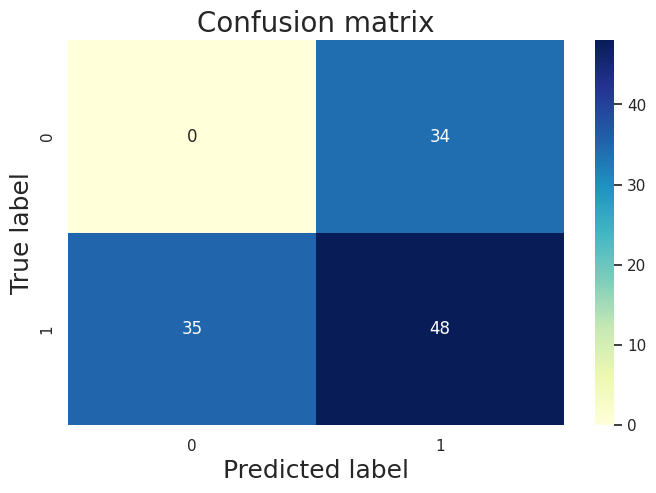

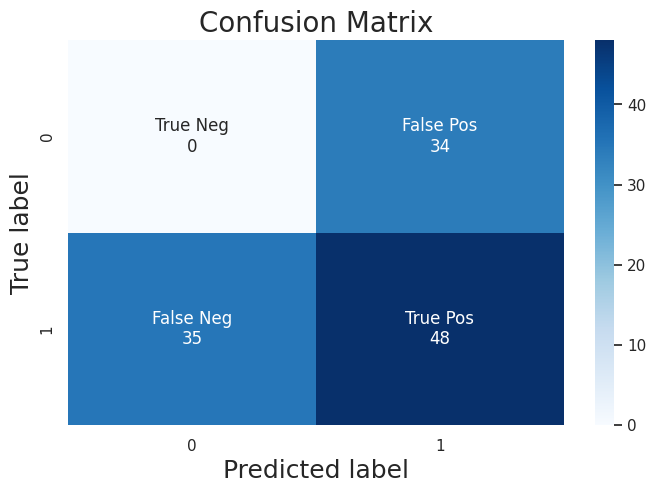

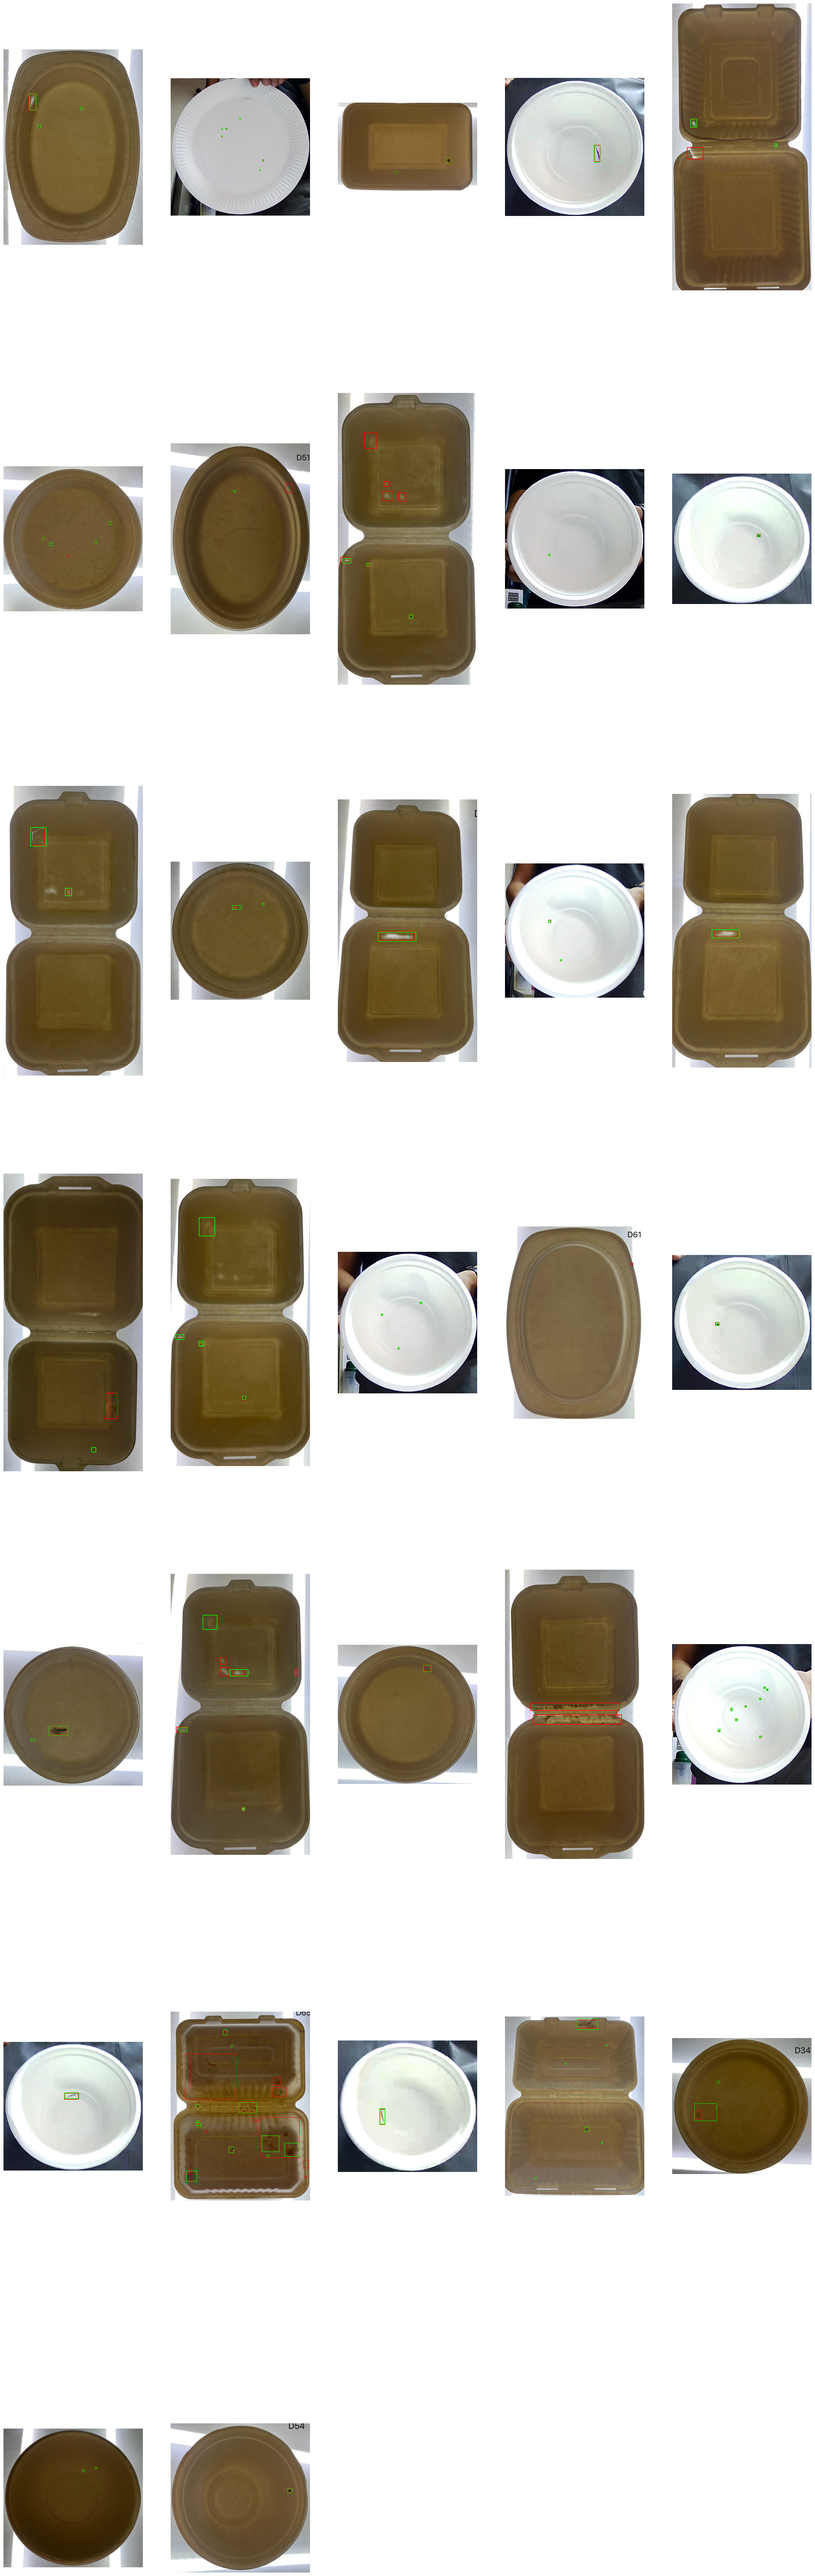

In [58]:
# Plot img Prediction
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

res = Eva_table
w = 20
h = 20
fig = plt.figure(figsize=(30, 100))
columns = 5
rows = 7

# Eva_table = test_df
fileName = list(set(Eva_table['image_id']))#.tolist()

for m in range(1, columns*rows +1):
    res = Eva_table[Eva_table['image_id'] == fileName[m-1]]

    i = 0
    #load image origin save to test.jpg
    import cv2
    from IPython.display import Image
    img_path = res['img_path_cropped'].tolist()[0]
    img_c = cv2.imread(img_path)
    img_c = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

    for j in range(len(res['gt_xmin'].tolist()[i])):
        xmin_pre = int(res['gt_xmin'].tolist()[i][j])
        ymin_pre = int(res['gt_ymin'].tolist()[i][j])
        xmax_pre = int(res['gt_xmax'].tolist()[i][j])
        ymax_pre = int(res['gt_ymax'].tolist()[i][j])
        #print(xmin_pre, ymin_pre, xmax_pre, ymax_pre)
        if j == 0:
            image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 2)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 2)


    for j in range(len(res['pred_xmin'].tolist()[i])):
        xmin_pre = int(res['pred_xmin'].tolist()[i][j])
        ymin_pre = int(res['pred_ymin'].tolist()[i][j])
        xmax_pre = int(res['pred_xmax'].tolist()[i][j])
        ymax_pre = int(res['pred_ymax'].tolist()[i][j])
        #print(xmin_pre, ymin_pre, xmax_pre, ymax_pre)
        if j == 0:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0, 255, 0), 2)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0, 255, 0), 2)

    fig.add_subplot(rows, columns, m)
    plt.imshow(image_pre)
    plt.axis('off')
        
plt.show()

In [ ]:
# Plot img Prediction
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

res = Eva_table
w = 20
h = 20
fig = plt.figure(figsize=(30, 100))
columns = 3
rows = 8


# fileName = Eva_table['fileName'].tolist()
for m in range(1, columns*rows +1):
    res = Eva_table[Eva_table['image_id'] == fileName[m-1]]

    i = 0
    #load image origin save to test.jpg
    import cv2
    from IPython.display import Image
    img_path = res['img_path_cropped'].tolist()[0]
    img_c = cv2.imread(img_path)
    img_c = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

    for j in range(len(res['gt_xmin'].tolist()[i])):
        xmin_pre = int(res['gt_xmin'].tolist()[i][j])
        ymin_pre = int(res['gt_ymin'].tolist()[i][j])
        xmax_pre = int(res['gt_xmax'].tolist()[i][j])
        ymax_pre = int(res['gt_ymax'].tolist()[i][j])
        if j == 0:
            image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255,0,0), 6)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255,0,0), 6)

    for j in range(len(res['pred_xmin'].tolist()[i])):
        xmin_pre = int(res['pred_xmin'].tolist()[i][j])
        ymin_pre = int(res['pred_ymin'].tolist()[i][j])
        xmax_pre = int(res['pred_xmax'].tolist()[i][j])
        ymax_pre = int(res['pred_ymax'].tolist()[i][j])
        if j == 0:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0, 255, 0), 3)
#             image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0, 255, 0), 3)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0, 255, 0), 3)

    fig.add_subplot(rows, columns, m)
    plt.imshow(image_pre)
    plt.axis('off')
        
plt.show()

In [ ]:
# # Plot img Prediction
# import numpy as np
# %matplotlib inline
# from matplotlib import pyplot as plt
# plt.rcParams["axes.grid"] = False


# # fileName = Eva_table['fileName'].tolist()
# for m in range(1, columns*rows +1):
#     res = Eva_table[Eva_table['fileName'] == fileName[m-1]]
#     fig = plt.figure(figsize=(15, 15))
#     i = 0
#     #load image origin save to test.jpg
#     import cv2
#     from IPython.display import Image
#     img_path = res['Path'].tolist()[0]
#     img_c = cv2.imread(img_path)
#     img_c = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)
    
#     for j in range(len(res['pred_xmin'].tolist()[i])):
#         xmin_pre = int(res['pred_xmin'].tolist()[i][j])
#         ymin_pre = int(res['pred_ymin'].tolist()[i][j])
#         xmax_pre = int(res['pred_xmax'].tolist()[i][j])
#         ymax_pre = int(res['pred_ymax'].tolist()[i][j])
#         if j == 0:
#             #image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0, 255, 0), 3)
#             image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0, 255, 0), 1)
#         else:
#             image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0, 255, 0), 1)

# #     fig.add_subplot(rows, columns, m)
#     plt.imshow(image_pre)
#     plt.axis('off')
#     plt.show()


In [ ]:
# Plot img Prediction
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

res = Eva_table
w = 20
h = 20
fig = plt.figure(figsize=(30, 100))
columns = 3
rows = 8


# fileName = Eva_table['fileName'].tolist()
for m in range(1, columns*rows +1):
    res = Eva_table[Eva_table['fileName'] == fileName[m-1]]

    i = 0
    #load image origin save to test.jpg
    import cv2
    from IPython.display import Image
    img_path = res['Path'].tolist()[0]
    img_c = cv2.imread(img_path)
    img_c = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

    for j in range(len(res['gt_xmin'].tolist()[i])):
        xmin_pre = int(res['gt_xmin'].tolist()[i][j])
        ymin_pre = int(res['gt_ymin'].tolist()[i][j])
        xmax_pre = int(res['gt_xmax'].tolist()[i][j])
        ymax_pre = int(res['gt_ymax'].tolist()[i][j])
        if j == 0:
            image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255,0,0), 6)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255,0,0), 6)

#     for j in range(len(res['pred_xmin'].tolist()[i])):
#         xmin_pre = int(res['pred_xmin'].tolist()[i][j])
#         ymin_pre = int(res['pred_ymin'].tolist()[i][j])
#         xmax_pre = int(res['pred_xmax'].tolist()[i][j])
#         ymax_pre = int(res['pred_ymax'].tolist()[i][j])
#         if j == 0:
#             #image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0, 255, 0), 3)
#             image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0, 255, 0), 3)
#         else:
#             image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0, 255, 0), 3)

    fig.add_subplot(rows, columns, m)
    plt.imshow(image_pre)
    plt.axis('off')
        
plt.show()